In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Import Data

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [6]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

# Data Preprocessing

In [7]:
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

x_test = test.iloc[:,:]

In [8]:
x_train.shape, x_test.shape, y_train.shape

((42000, 784), (28000, 784), (42000,))

In [9]:
print('Maximum value is',x_train.values.max(), 'and the minimum value is',x_train.values.min(),'in the input dataset')

Maximum value is 255 and the minimum value is 0 in the input dataset


### Plot images from given pixel dataset

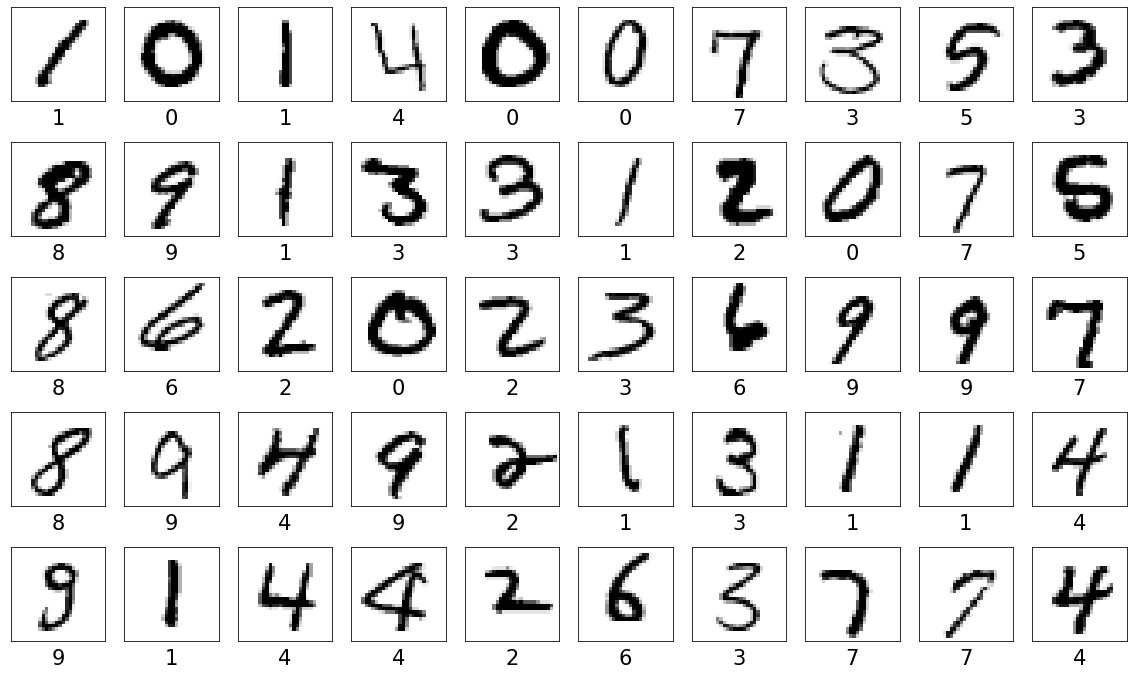

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,12))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(np.array(x_train.iloc[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i], fontsize = 21)
plt.show()

## Feature Engineering

##### Rotate by 15, change the height by 0.1, zoom by 0.1, shear by 0.1 the digit image with keras Image Data Generator

In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range= 15,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            shear_range=0.1
                            )

#### Reshape the input values into(1,28,28,1) shape to pass in dataget

In [12]:
input_datagen = x_train.values.reshape(-1,28,28,1)
input_datagen.shape

(42000, 28, 28, 1)

In [13]:
datagen.fit(input_datagen)

### Again reshape the input into 1 X 784 to fit in K Nearest Neighbour

In [14]:
x_train = input_datagen.reshape(-1,784)

## Model building

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
import warnings
warnings.filterwarnings('ignore')

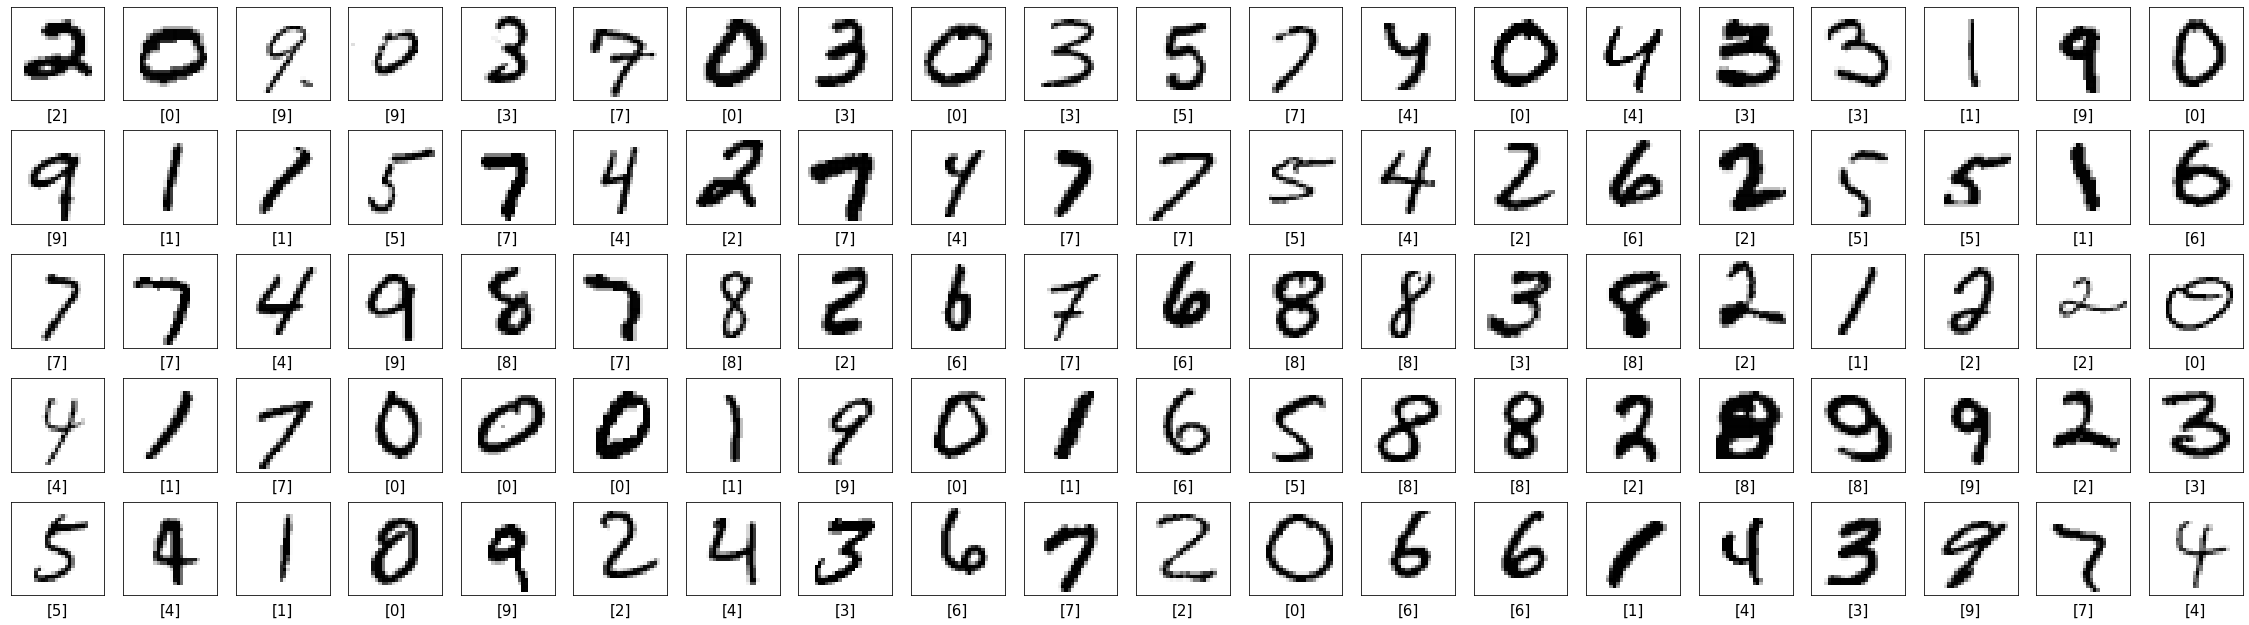

In [18]:
plt.figure(figsize = (40,11))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(np.array(x_test.iloc[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(knn.predict(x_test.values[i].reshape(-1,784)), fontsize= 15)
plt.show()

In [19]:
label = knn.predict(x_test.values.reshape(-1,784))
label[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3])

In [20]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label']=label
submission.to_csv('submission.csv', index = False)

In [21]:
pd.read_csv('submission.csv')

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
